In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

#Specify path for linux & windows:
#os.chdir ('/home/mike/GitFilesLocalRepo/NHS') #Ubuntu
os.chdir('Z:\DataAnalytics\LSE\Assignments\Course 2') #Windows
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [2]:
# Colour palette to make charts look better.
blue, = sns.color_palette("muted", 1) 

# Dark grid, white grid, dark, white, and ticks.
sns.set_style('whitegrid') 

# Font size of the axes titles.
plt.rc('axes', titlesize=18) 

# Font size of the x and y labels.
plt.rc('axes', labelsize=14)    

# Font size of the tick labels.
plt.rc('xtick', labelsize=13,color='#4f4e4e') 

# Font size of the tick labels.
plt.rc('ytick', labelsize=13,color='#4f4e4e')  

# Font size of the legend.
plt.rc('legend', fontsize=13)

# Default text size.
plt.rc('font', size=13)      

In [109]:
# Import and sense-check the actual_duration.csv data set as ad.
ad=pd.read_csv('actual_duration.csv').sort_values(by=['count_of_appointments', 'actual_duration'], ascending=False)
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])
# View the DataFrame type.
print (ad.dtypes)
# Determine the descriptive statistics of the data set.
ad.describe()

ad.head ()

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object


,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
125518,A3A8R,E38000255,NHS North East London ICB - A3A8R,E54000029,E40000003,2022-01-17,Unknown / Data Quality,15400
125812,A3A8R,E38000255,NHS North East London ICB - A3A8R,E54000029,E40000003,2022-02-28,Unknown / Data Quality,15081
125861,A3A8R,E38000255,NHS North East London ICB - A3A8R,E54000029,E40000003,2022-03-07,Unknown / Data Quality,14767
126400,A3A8R,E38000255,NHS North East London ICB - A3A8R,E54000029,E40000003,2022-05-23,Unknown / Data Quality,14665
125616,A3A8R,E38000255,NHS North East London ICB - A3A8R,E54000029,E40000003,2022-01-31,Unknown / Data Quality,14664


In [185]:
# Import and sense-check the actual_duration.csv data set as ad.
ar=pd.read_csv('appointments_regional.csv')

# View the DataFrame type.
print (ar.dtypes)

# Determine the descriptive statistics of the data set.
ar.describe()

ar.head ()

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [236]:
# Import and sense-check the actual_duration.csv data set as ad.
nc=pd.read_excel('national_categories.xlsx')

# View the DataFrame type.
print (nc.dtypes)

# Determine the descriptive statistics of the data set.
nc.describe()

nc.head ()

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


# Find patterns in the Actual Duration dataframe

In [20]:
# Determine the descriptive statistics of the data set.
print(ad['sub_icb_location_name'].value_counts())
print(ad['appointment_date'].min())
print(ad['appointment_date'].max())


NHS North East London ICB - A3A8R                 1484
NHS Norfolk and Waveney ICB - 26A                 1484
NHS North West London ICB - W2U3Z                 1484
NHS Kent and Medway ICB - 91Q                     1484
NHS Greater Manchester ICB - 14L                  1484
                                                  ... 
NHS Staffordshire and Stoke-on-Trent ICB - 05D    1051
NHS South Yorkshire ICB - 03L                     1028
NHS North East and North Cumbria ICB - 00P        1025
NHS South Yorkshire ICB - 02P                     1022
NHS Cheshire and Merseyside ICB - 01F             1013
Name: sub_icb_location_name, Length: 106, dtype: int64
2021-12-01 00:00:00
2022-06-30 00:00:00


In [83]:
#Subset the df to include columns for study
ad_sub = ad[['sub_icb_location_name', 'appointment_date', 'actual_duration', 'count_of_appointments']]
ad_sub.head()

,sub_icb_location_name,appointment_date,actual_duration,count_of_appointments
125518,NHS North East London ICB - A3A8R,2022-01-17,Unknown / Data Quality,15400
125812,NHS North East London ICB - A3A8R,2022-02-28,Unknown / Data Quality,15081
125861,NHS North East London ICB - A3A8R,2022-03-07,Unknown / Data Quality,14767
126400,NHS North East London ICB - A3A8R,2022-05-23,Unknown / Data Quality,14665
125616,NHS North East London ICB - A3A8R,2022-01-31,Unknown / Data Quality,14664


In [84]:
ad[['sub_icb_location_name', 'appointment_date', 'actual_duration', 'count_of_appointments']].\
    groupby(['sub_icb_location_name']).sum().sort_values(by='count_of_appointments', ascending= False).reset_index()

,sub_icb_location_name,count_of_appointments
0,NHS North West London ICB - W2U3Z,6976986
1,NHS North East London ICB - A3A8R,5341883
2,NHS Kent and Medway ICB - 91Q,5209641
3,NHS Hampshire and Isle Of Wight ICB - D9Y0V,4712737
4,NHS South East London ICB - 72Q,4360079
...,...,...
101,NHS Greater Manchester ICB - 00V,362242
102,NHS Cheshire and Merseyside ICB - 01V,358060
103,NHS Cheshire and Merseyside ICB - 01F,348396
104,NHS Cheshire and Merseyside ICB - 01T,340895


In [106]:
#Filter Top 5 ICB & Bottom 5 ICB
filter_list_top = ['NHS North West London ICB - W2U3Z','NHS North East London ICB - A3A8R', 'NHS Kent and Medway ICB - 91Q','NHS Hampshire and Isle Of Wight ICB - D9Y0V','NHS South East London ICB - 72Q']
ad_sub_top = ad_sub[ad_sub.sub_icb_location_name.isin(filter_list_top)]

filter_list_end = ['NHS Lancashire and South Cumbria ICB - 02G','NHS Cheshire and Merseyside ICB - 01T', 'NHS Cheshire and Merseyside ICB - 01F','NHS Cheshire and Merseyside ICB - 01V','NHS Greater Manchester ICB - 00V']
ad_sub_end = ad_sub[ad_sub.sub_icb_location_name.isin(filter_list_end)] 

ad_sub_top

,sub_icb_location_name,appointment_date,actual_duration,count_of_appointments
125518,NHS North East London ICB - A3A8R,2022-01-17,Unknown / Data Quality,15400
125812,NHS North East London ICB - A3A8R,2022-02-28,Unknown / Data Quality,15081
125861,NHS North East London ICB - A3A8R,2022-03-07,Unknown / Data Quality,14767
126400,NHS North East London ICB - A3A8R,2022-05-23,Unknown / Data Quality,14665
125616,NHS North East London ICB - A3A8R,2022-01-31,Unknown / Data Quality,14664
...,...,...,...,...
108517,NHS South East London ICB - 72Q,2022-04-10,1-5 Minutes,1
108732,NHS South East London ICB - 72Q,2022-05-15,1-5 Minutes,1
108776,NHS South East London ICB - 72Q,2022-05-22,1-5 Minutes,1
131236,NHS Hampshire and Isle Of Wight ICB - D9Y0V,2022-02-06,1-5 Minutes,1


# Check trends of appointment duration in the top 5 ICB (ranking basis total count of appointments)

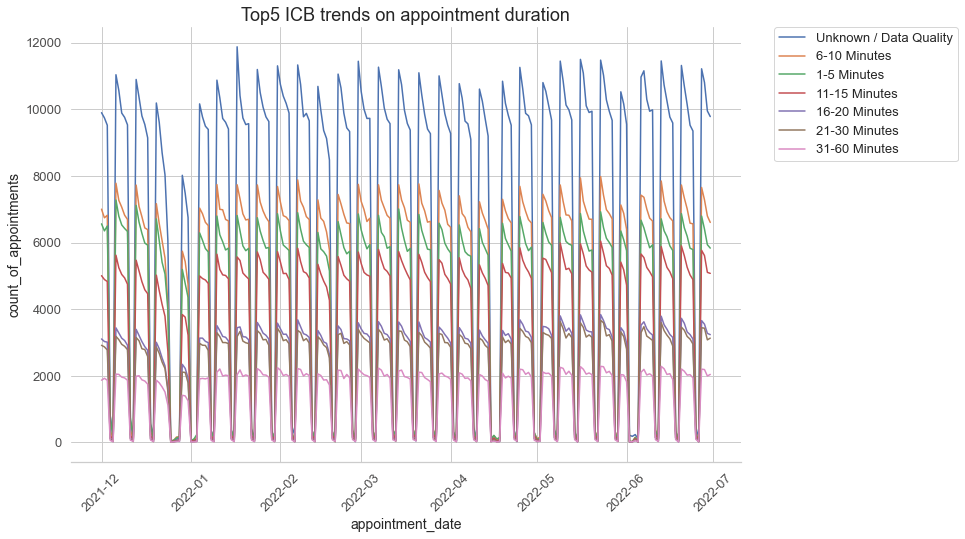

In [103]:
# Plot the trend
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.despine(left=True)
plt.title("Top5 ICB trends on appointment duration")
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='actual_duration', data=ad_sub_top, ci=None)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0)
plt.show;

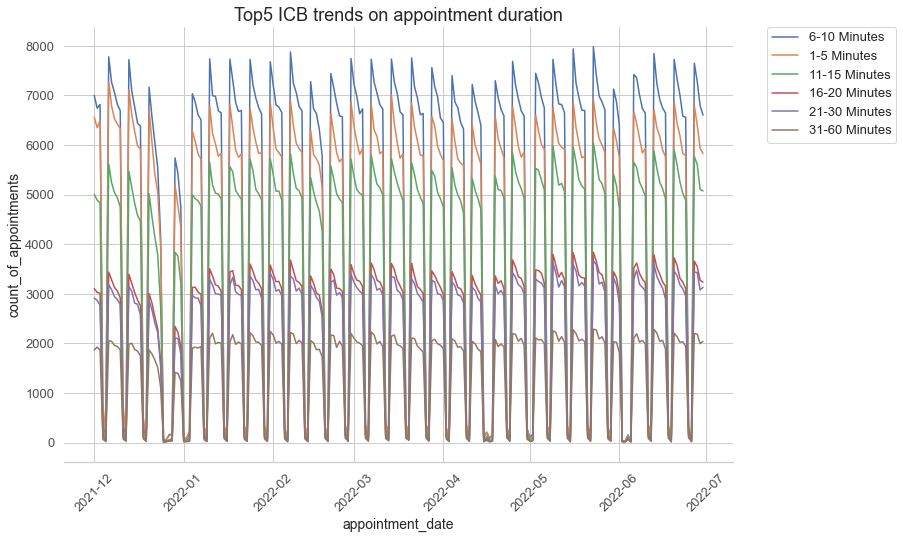

In [102]:
# Remove unknown Data Quality. data=ad_df_east[ad_df_east.actual_duration!='Unknown / Data Quality'

fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.despine(left=True)
plt.title("Top5 ICB trends on appointment duration")
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='actual_duration', data=ad_sub_top[ad_sub_top.actual_duration!='Unknown / Data Quality'], ci=None)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0)
plt.show;

# Check trend of the bottom 5 ICB (ranking basis total count of appointments)

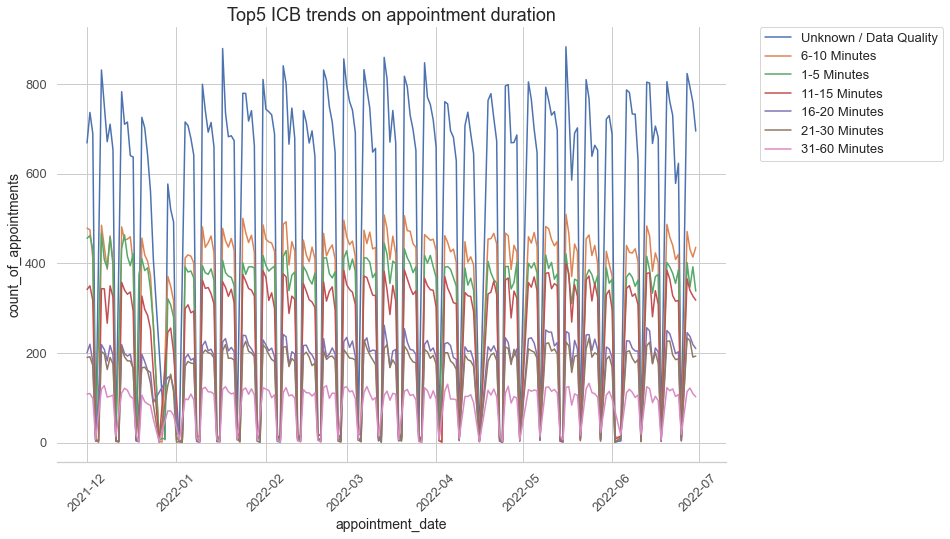

In [107]:
#Plot the trend
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.despine(left=True)
plt.title("Top5 ICB trends on appointment duration")
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='actual_duration', data=ad_sub_end, ci=None)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0)
plt.show;

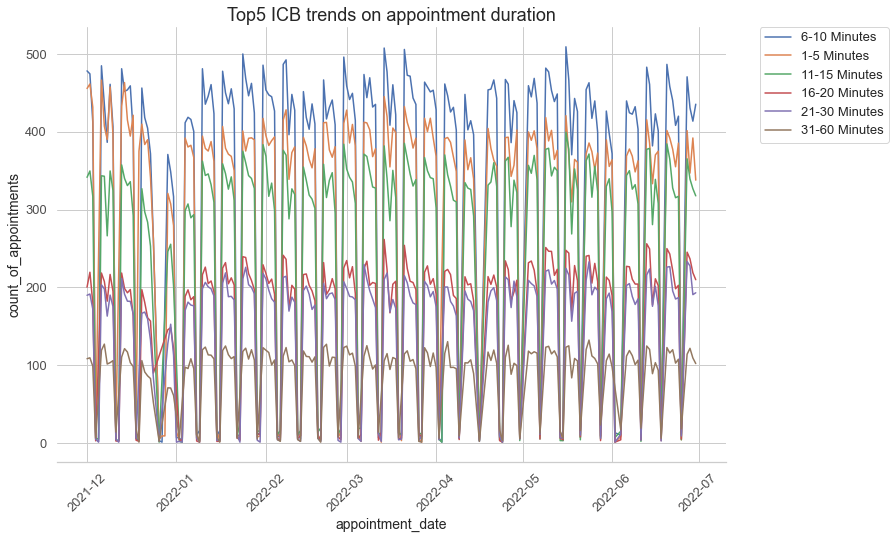

In [108]:
#Remove Unkknown Data Quality
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.despine(left=True)
plt.title("Top5 ICB trends on appointment duration")
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='actual_duration', data=ad_sub_end[ad_sub_end.actual_duration!='Unknown / Data Quality'], ci=None)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0)
plt.show;

# Merge Dataframes to find further trends

In [186]:
print(ar.info())

print(nc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       

In [237]:
# Merge dataframes for further digging
ar.head()

nc.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [238]:
#sort nc df to check for top appointments
nc = nc.sort_values(by='count_of_appointments', ascending=False)
nc

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
732144,2022-05-09,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16590,2022-05
732705,2022-05-23,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16527,2022-05
724735,2021-10-11,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16495,2021-10
724978,2021-10-18,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16492,2021-10
732446,2022-05-16,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16412,2022-05
...,...,...,...,...,...,...,...,...
585613,2021-11-10,E54000060,NHS Nottingham and Nottinghamshire ICB - 52R,General Practice,Care Related Encounter,Walk-in,1,2021-11
585606,2021-11-10,E54000060,NHS Nottingham and Nottinghamshire ICB - 52R,Other,Care Related Encounter,Non-contractual chargeable work,1,2021-11
277022,2021-08-06,E54000010,NHS Staffordshire and Stoke-on-Trent ICB - 05V,Extended Access Provision,Care Related Encounter,General Consultation Acute,1,2021-08
585593,2021-11-09,E54000060,NHS Nottingham and Nottinghamshire ICB - 52R,Extended Access Provision,Care Related Encounter,General Consultation Acute,1,2021-11


### we will choose the sub_icb_location_name = NHS North East London ICB - A3A8R	to filter the df

In [239]:
#Subset nc and to chose recorcds for 2022-02 and 
#icb_ons_code = E54000029 one of the top five in appointments ICB
nc_feb_NE = nc.loc[(nc['appointment_month']=='2022-03') & (nc['icb_ons_code']=='E54000029')].reset_index()
nc_feb_NE


,index,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,729941,2022-03-07,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,16116,2022-03
1,730206,2022-03-14,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,15866,2022-03
2,730223,2022-03-15,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,15696,2022-03
3,730479,2022-03-21,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,15672,2022-03
4,730730,2022-03-28,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,General Consultation Routine,15345,2022-03
...,...,...,...,...,...,...,...,...,...
1187,730366,2022-03-18,E54000029,NHS North East London ICB - A3A8R,Extended Access Provision,Care Related Encounter,Service provided by organisation external to t...,1,2022-03
1188,730421,2022-03-19,E54000029,NHS North East London ICB - A3A8R,General Practice,Care Related Encounter,Care Home Visit,1,2022-03
1189,730364,2022-03-18,E54000029,NHS North East London ICB - A3A8R,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,1,2022-03
1190,730325,2022-03-17,E54000029,NHS North East London ICB - A3A8R,Other,Care Related Encounter,Unplanned Clinical Activity,1,2022-03


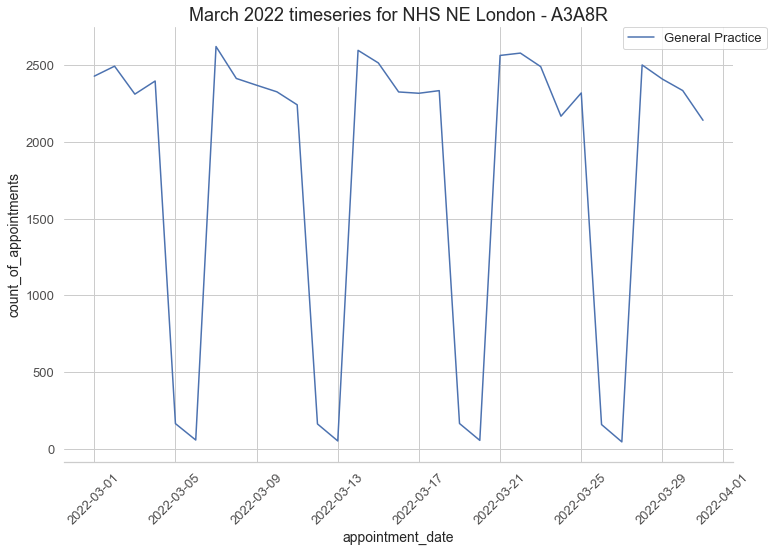

In [240]:
#Plot timeseries
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.despine(left=True)
plt.title("March 2022 timeseries for NHS NE London - A3A8R")
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_feb_NE[nc_feb_NE.service_setting=='General Practice'], ci=None)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0)
plt.show;

In [250]:
#Subset ar and to chose recorcds for 2022-02 and 
#icb_ons_code = E54000029 one of the top five in appointments ICB
ar_feb_NE = ar.loc[(ar['appointment_month']=='2022-03') & (ar['icb_ons_code']=='E54000029')]
ar_feb_NE



,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
415672,E54000029,2022-03,Attended,GP,Face-to-Face,1 Day,34255
415673,E54000029,2022-03,Attended,GP,Face-to-Face,15 to 21 Days,7678
415674,E54000029,2022-03,Attended,GP,Face-to-Face,2 to 7 Days,60620
415675,E54000029,2022-03,Attended,GP,Face-to-Face,22 to 28 Days,4134
415676,E54000029,2022-03,Attended,GP,Face-to-Face,8 to 14 Days,20331
...,...,...,...,...,...,...,...
415924,E54000029,2022-03,Unknown,Unknown,Unknown,2 to 7 Days,66
415925,E54000029,2022-03,Unknown,Unknown,Unknown,22 to 28 Days,5
415926,E54000029,2022-03,Unknown,Unknown,Unknown,8 to 14 Days,46
415927,E54000029,2022-03,Unknown,Unknown,Unknown,More than 28 Days,5


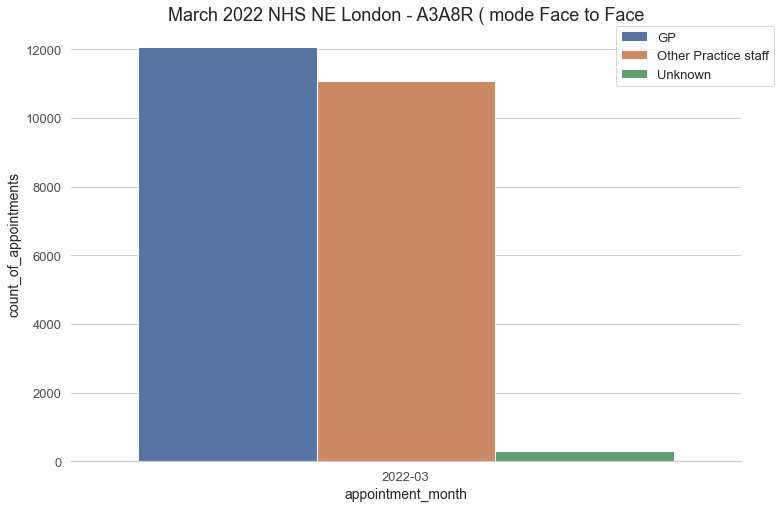

In [254]:

#Plot bar
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.despine(left=True)
plt.title("March 2022 NHS NE London - A3A8R ( mode Face to Face")
sns.barplot(x='appointment_month', y='count_of_appointments', hue='hcp_type', data=ar_feb_NE[ar_feb_NE.appointment_mode=='Face-to-Face'], ci=None)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0)
plt.show;

In [253]:
#Subset ar and to chose recorcds for icb_ons_code = E54000029 one of the top five in appointments ICB
ar_NE = ar.loc[ (ar['icb_ons_code']=='E54000029')]
ar_NE

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
408999,E54000029,2020-01,Attended,GP,Face-to-Face,1 Day,31129
409000,E54000029,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,21973
409001,E54000029,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,72225
409002,E54000029,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,11405
409003,E54000029,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,44873
...,...,...,...,...,...,...,...
416694,E54000029,2022-06,Unknown,Unknown,Unknown,2 to 7 Days,27
416695,E54000029,2022-06,Unknown,Unknown,Unknown,22 to 28 Days,5
416696,E54000029,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,25
416697,E54000029,2022-06,Unknown,Unknown,Unknown,More than 28 Days,1


In [1]:
#Plot for mode Face to Face
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.despine(left=True)
plt.title("NHS NE London ( mode Face to Face)")
sns.pointplot(x='appointment_month', y='count_of_appointments', hue='hcp_type', data=ar_NE[ar_NE.appointment_mode=='Face-to-Face'], ci=None)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0);

NameError: name 'plt' is not defined